In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(n_samples=120, centers=3, n_features=2, random_state=2)
print(f"Shape of X: {X.shape}")

X = StandardScaler().fit_transform(X)
colors = {0: 'red', 1: 'blue', 2: 'green'}

Shape of X: (120, 2)


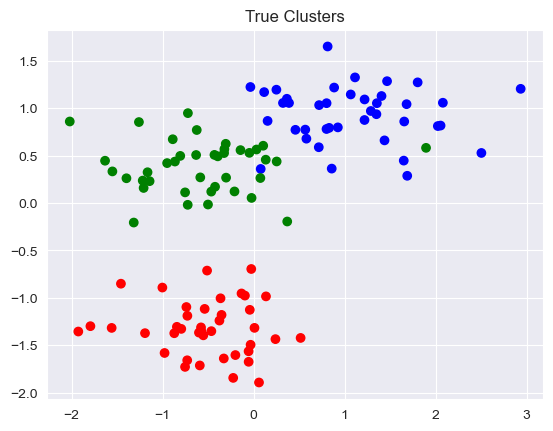

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=[colors[col] for col in y])
plt.title("True Clusters")
plt.show()

In [4]:
def euclidean(point, data):
    """
    Return euclidean distances between a point & a dataset
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))



In [5]:
class KMeans:
    # https://github.com/pavankalyan1997/Machine-learning-without-any-libraries/blob/master/2.Clustering/1.K_Means_Clustering/K_means_clustering.ipynb
    # https://github.com/turnerluke/ML-algos/blob/main/k_means/k_means.py
    
    # TODO: Document code
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.max_iter = max_iter
    
    def initialize_centroids(self, X):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        centroids = [X[np.random.choice(len(X))]]
        
        for _ in range(self.k-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X) for centroid in centroids], axis=0)
            
            # Normalize the distances    
            dists /= np.sum(dists)
            
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            centroids.append(X[new_centroid_idx])
        
        return centroids
    
    
    def fit(self, X):
        
        self.centroids = self.initialize_centroids(X)
        
        for iter in range(self.max_iter):
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.k)]
            
            for x in X:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)            
            
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
        
        
        self.sorted_points = sorted_points
    
    
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)  # Get distance of x from each centroid
            centroid_idx = np.argmin(dists)  # Get minimum distance centroid from x
            centroids.append(self.centroids[centroid_idx])  #
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

    def inertia(self):
        # Calculate the WCSS
        wcss = 0
        for i in range(self.k):
            cluster_points = np.array(self.sorted_points[i])
            centroid = self.centroids[i]
            wcss += np.sum((cluster_points - centroid)**2)
        return wcss
    
    def classification_error(self, y):
        return np.sum(classification == y) / (len(classification))
        
        
        

In [6]:
kmeans = KMeans(3)
kmeans.fit(X)

In [7]:
class_centers, classification = kmeans.evaluate(X)

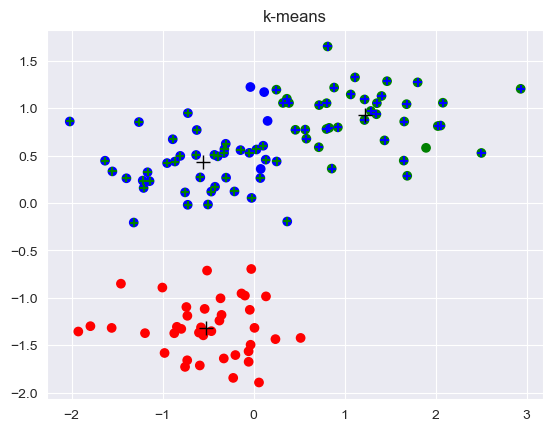

In [8]:
plt.scatter(X[:, 0],  X[:, 1], c=[colors[col] for col in classification])
plt.scatter(X[:, 0],  X[:, 1], c=[colors[col] for col in y], marker='+')
plt.plot([x for x, _ in kmeans.centroids], [y for _, y in kmeans.centroids], '+', markersize=10, c='black')
plt.title("k-means")
plt.show()

In [9]:
# Cluster Classification Error
err = kmeans.classification_error(y)

print(f"Classification Error: {err}")

Classification Error: 0.375


C:\Users\mbans\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mbans\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


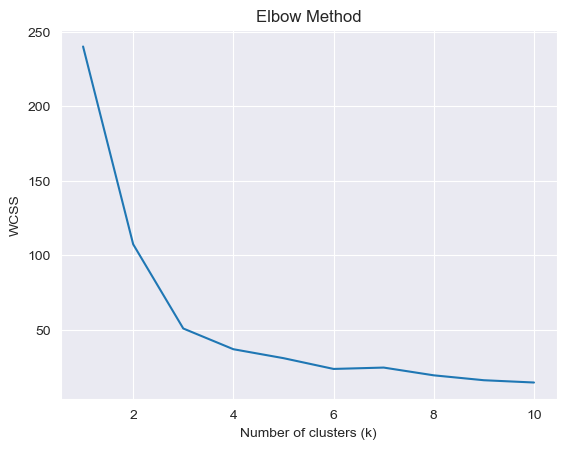

In [10]:
# Elbow Method for Evaluating choice of K

max_k = 10

wcss = []
for k in range(1, max_k+1):
    kmeans = KMeans(k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia())

plt.plot(range(1, max_k+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()